In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

price_earning = pd.read_csv('price_earning.csv')
price_earning.sort_values(by='month', ascending=True, inplace=True)
price_earning.reset_index(drop=True, inplace=True)
price_earning.head()

,month,eps_ttm,eps_ttm_diff,epssurprisepct,close_mean
0,2015-02,1.27,0.04,-0.0328,27.049290
1,2015-05,1.29,0.02,-0.0040,27.383825
2,2015-08,1.34,0.05,0.0437,33.382857
3,2015-11,1.39,0.05,0.0201,37.981950
4,2016-03,1.48,0.09,0.0698,37.339364


In [2]:
xticks = np.arange(0, len(price_earning), step=3)
xticks

array([ 0,  3,  6,  9, 12, 15, 18])

<ipython-input-3-ed02e03476af>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid') # 격자


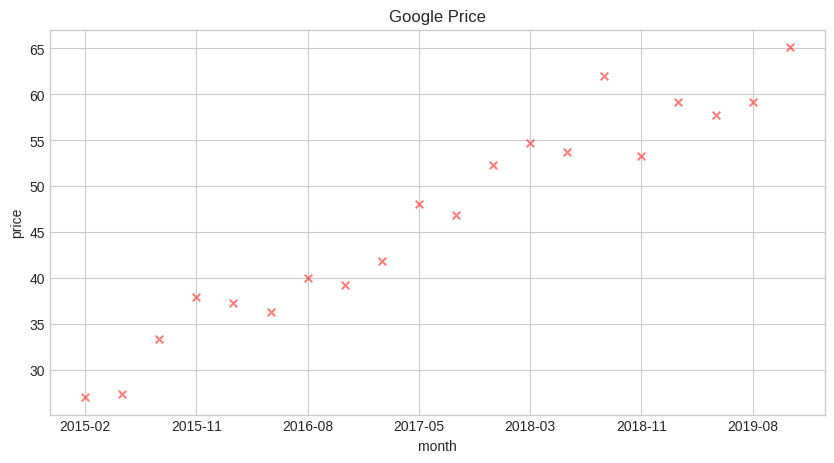

In [3]:
plt.style.use('seaborn-whitegrid') # 격자

# fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,14))
fig = plt.figure(figsize=(10, 5)) # figure(1): 캔버스 / 가로, 세로 사이즈 설정
ax = plt.axes() # axe(N): 도표

ax.scatter(price_earning['month'], price_earning['close_mean'], # 산점도
           s=30, # 점의 크기
           c='red', marker='x',
           alpha=0.5) # 투명도(0~1)
ax.set(xlabel='month', ylabel='price', title='Google Price')
ax.set_xticks(price_earning['month'][xticks]) # x축 눈금 표기
plt.show()

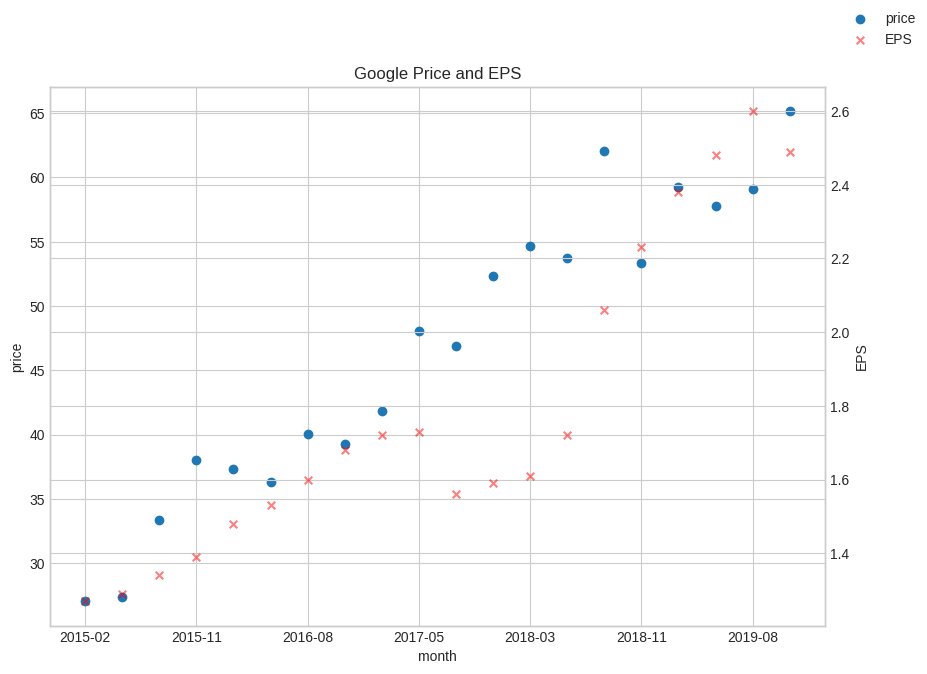

In [4]:
fig, ax1 = plt.subplots(figsize=(10,7))
ax1.scatter(price_earning['month'], price_earning['close_mean'], label='price')
ax1.set_xlabel('month')
ax1.set_ylabel('price')
ax1.set_title('Google Price and EPS')
ax1.set_xticks(price_earning['month'][np.arange(0, len(price_earning), step=3)])

ax2 = ax1.twinx() # 두 도표를 겹치기
ax2.scatter(price_earning['month'], price_earning['eps_ttm'],
            label='EPS', s=30, c='red', marker='x', alpha=0.5)
ax2.set_ylabel('EPS')
ax2.set_xticks(price_earning['month'][np.arange(0, len(price_earning), step=3)])

fig.legend(loc='upper right')
plt.show()

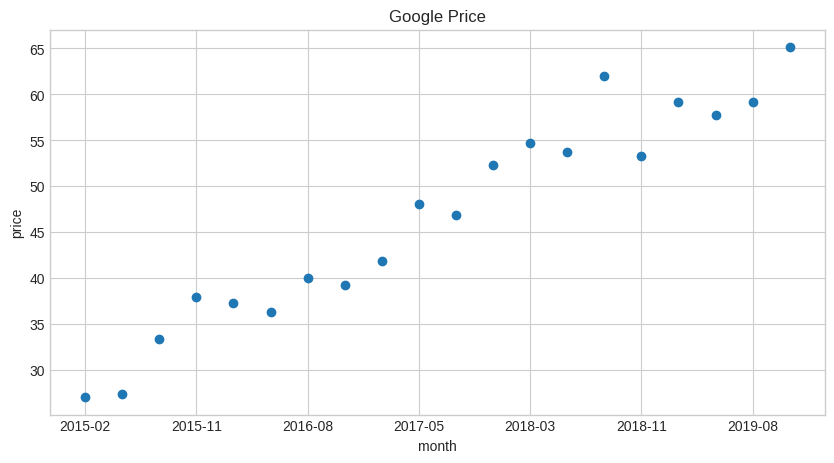

In [5]:
fia, ax = plt.subplots(figsize=(10,5))
ax.scatter(price_earning['month'], price_earning['close_mean'])
ax.set(xlabel='month', ylabel='price', title='Google Price')
ax.set_xticks(price_earning['month'][np.arange(0, len(price_earning), step=3)])
plt.show()

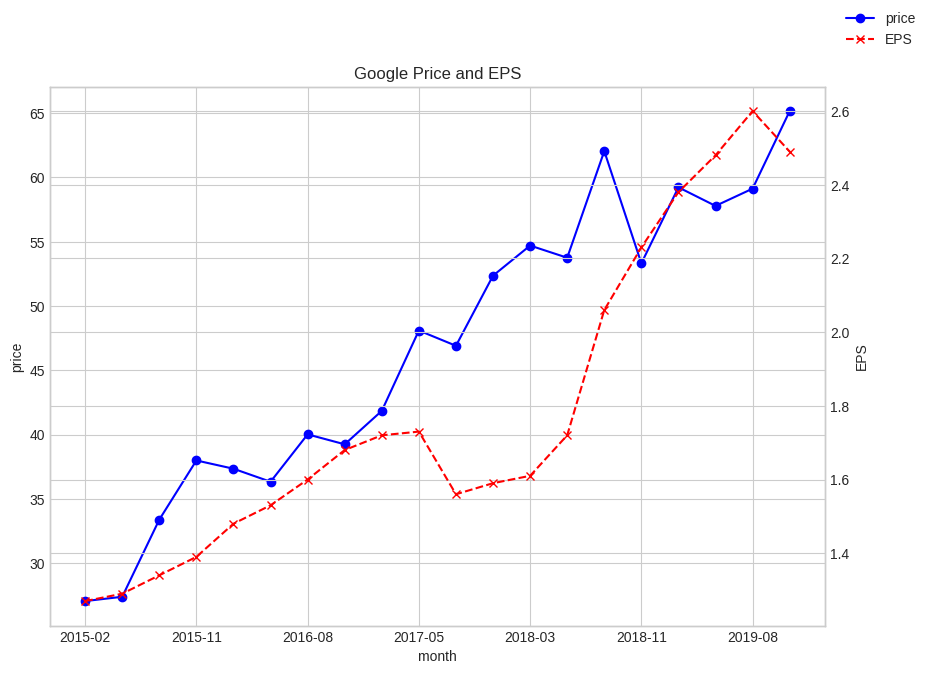

In [6]:
fig, ax1 = plt.subplots(figsize=(10,7))

# 선 그래프(line plot)
ax1.plot(price_earning['month'], price_earning['close_mean'],
            label='price', marker='o', c='blue', linestyle='solid')
ax1.set_xlabel('month')
ax1.set_ylabel('price')
ax1.set_title('Google Price and EPS')
ax1.set_xticks(price_earning['month'][np.arange(0, len(price_earning), step=3)])

ax2 = ax1.twinx()
ax2.plot(price_earning['month'], price_earning['eps_ttm'],
            label='EPS', c='red', marker='x', linestyle='dashed')
ax2.set_ylabel('EPS')
ax2.set_xticks(price_earning['month'][np.arange(0, len(price_earning), step=3)])

fig.legend(loc='upper right')
plt.show()

In [7]:
import pickle

model = pickle.load(open('model.pickle', 'rb'))
model.params

Intercept     5.831214
eps_ttm      22.832824
dtype: float64

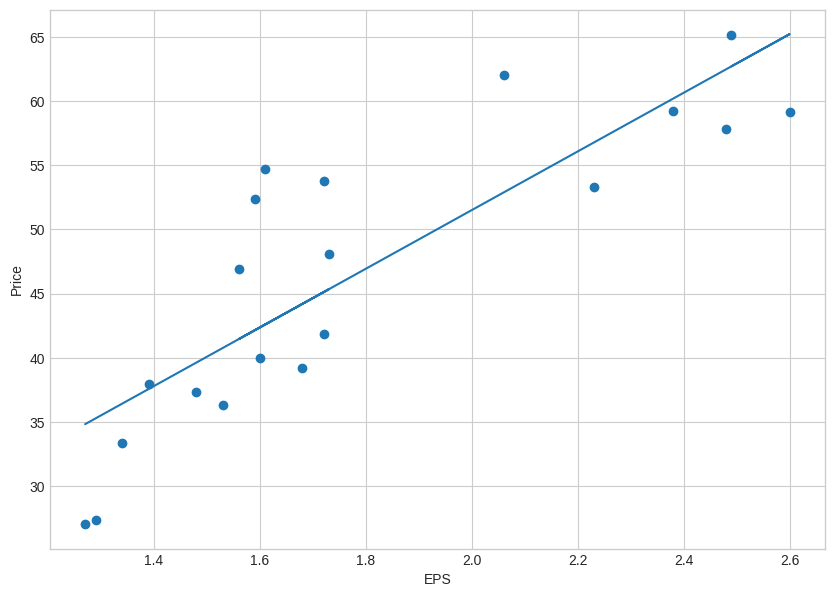

In [8]:
b1, b0 = model.params['eps_ttm'], model.params['Intercept']

fig, ax = plt.subplots(figsize=(10, 7))
x = price_earning['eps_ttm']
y = price_earning['close_mean']
ax.scatter(x, y)
ax.plot(x, b1*x+b0)
ax.set(xlabel='EPS', ylabel='Price')
plt.show()

In [9]:
prediction = (model.get_prediction(price_earning).summary_frame(alpha=0.05)) # 95%의 신뢰구간 및 예측구간
prediction # 평균, 평균의 표준오차(standard error), 신뢰구간 하한, 신뢰구간 상한, 예측구간 하한, 예측구간 상한

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,34.828901,2.259072,30.082766,39.575035,20.699074,48.958727
1,35.285557,2.206503,30.649866,39.921248,21.192444,49.378670
2,36.427198,2.079003,32.059375,40.795021,22.419912,50.434485
3,37.568839,1.957976,33.455284,41.682394,23.638745,51.498934
4,39.623794,1.760661,35.924781,43.322806,25.810435,53.437153
5,40.765435,1.665306,37.266758,44.264112,27.004369,54.526501
6,42.363733,1.553390,39.100181,45.627284,28.660559,56.066906
7,44.190359,1.462911,41.116896,47.263821,30.531209,57.849508
8,45.103671,1.434977,42.088896,48.118447,31.457607,58.749736
9,45.332000,1.429932,42.327824,48.336175,31.688273,58.975726


In [10]:
mean_eps_ttm, mean_close_mean = price_earning['eps_ttm'].mean(), price_earning['close_mean'].mean()
mean_eps_ttm, mean_close_mean

(1.7875, 46.644887118999236)

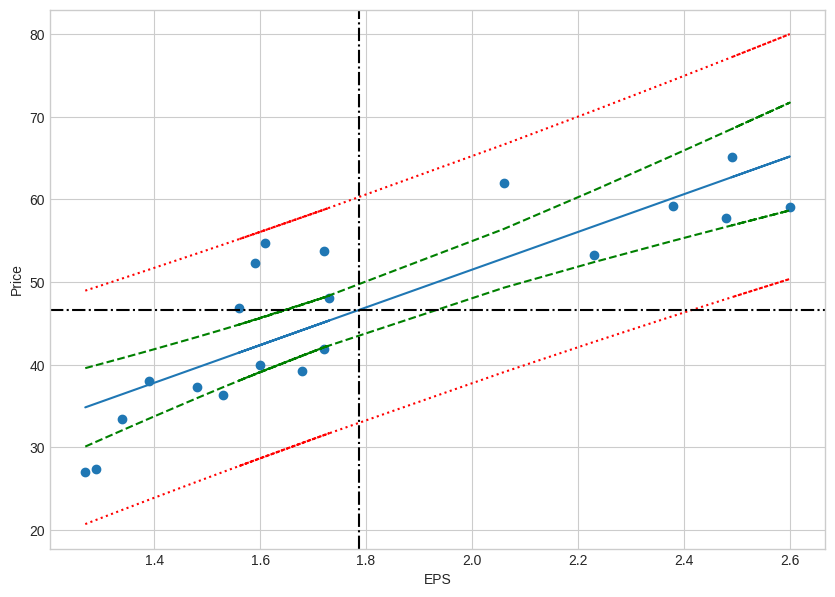

In [11]:
fig, ax = plt.subplots(figsize=(10, 7))
x = price_earning['eps_ttm']
y = price_earning['close_mean']
ax.scatter(x, y)
ax.plot(x, b1*x+b0)
ax.plot(x, prediction['mean_ci_lower'], c='green', linestyle='dashed')
ax.plot(x, prediction['mean_ci_upper'], c='green', linestyle='dashed')
ax.plot(x, prediction['obs_ci_lower'], c='red', linestyle='dotted')
ax.plot(x, prediction['obs_ci_upper'], c='red', linestyle='dotted')

ax.axhline(y=mean_close_mean, c='black', linestyle='dashdot') # 수평선
ax.axvline(x=mean_eps_ttm, c='black', linestyle='dashdot') # 수직선

ax.set(xlabel='EPS', ylabel='Price')
plt.show()

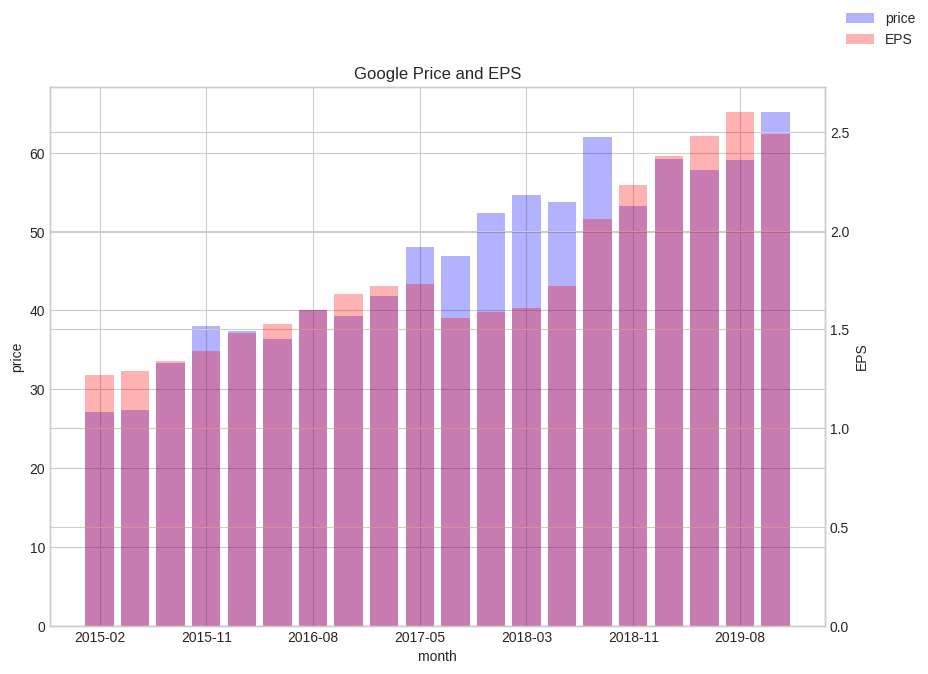

In [12]:
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.bar(price_earning['month'], price_earning['close_mean'], label='price', color='blue', alpha=0.3) # 막대 그래프
ax1.set_xlabel('month')
ax1.set_ylabel('price')
ax1.set_title('Google Price and EPS')
ax1.set_xticks(price_earning['month'][np.arange(0, len(price_earning), step=3)])
ax2 = ax1.twinx()
ax2.bar(price_earning['month'], price_earning['eps_ttm'], label='EPS', color='red', alpha=0.3)
ax2.set_ylabel('EPS')
ax2.set_xticks(price_earning['month'][np.arange(0, len(price_earning), step=3)])
fig.legend(loc='upper right')
plt.show()

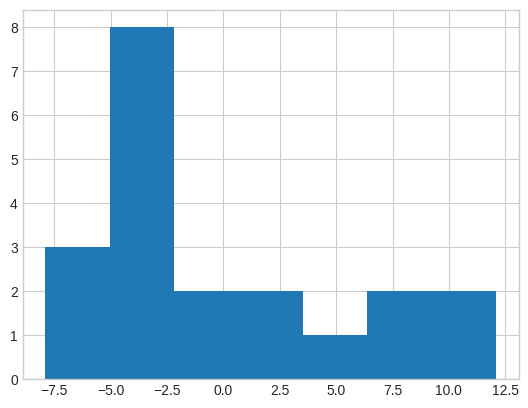

In [13]:
residuals = model.resid
fig, ax = plt.subplots()
ax.hist(residuals, bins=7) # 히스토그램
plt.show()

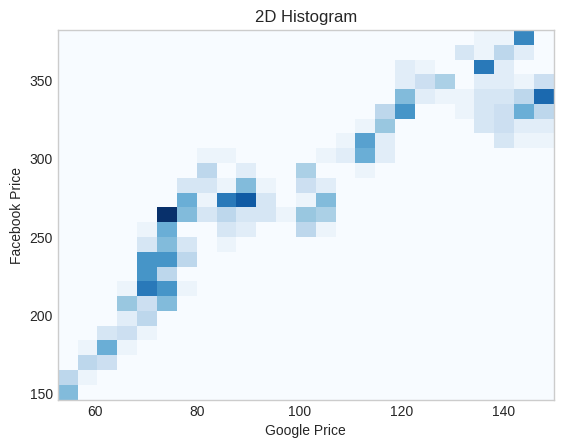

In [14]:
!pip install yahoo_fin > /dev/null&
import yahoo_fin.stock_info as si

google = si.get_data('googl')
fb = si.get_data('meta')

google = google[(google.index > '2020-01-01') & (google.index < '2022-01-01')]
fb = fb[(fb.index > '2020-01-01') & (fb.index < '2022-01-01')]

flg, ax = plt.subplots()
ax.hist2d(google['close'], fb['close'], bins=25, cmap='Blues')
ax.set(xlabel='Google Price', ylabel='Facebook Price', title='2D Histogram')
plt.show()

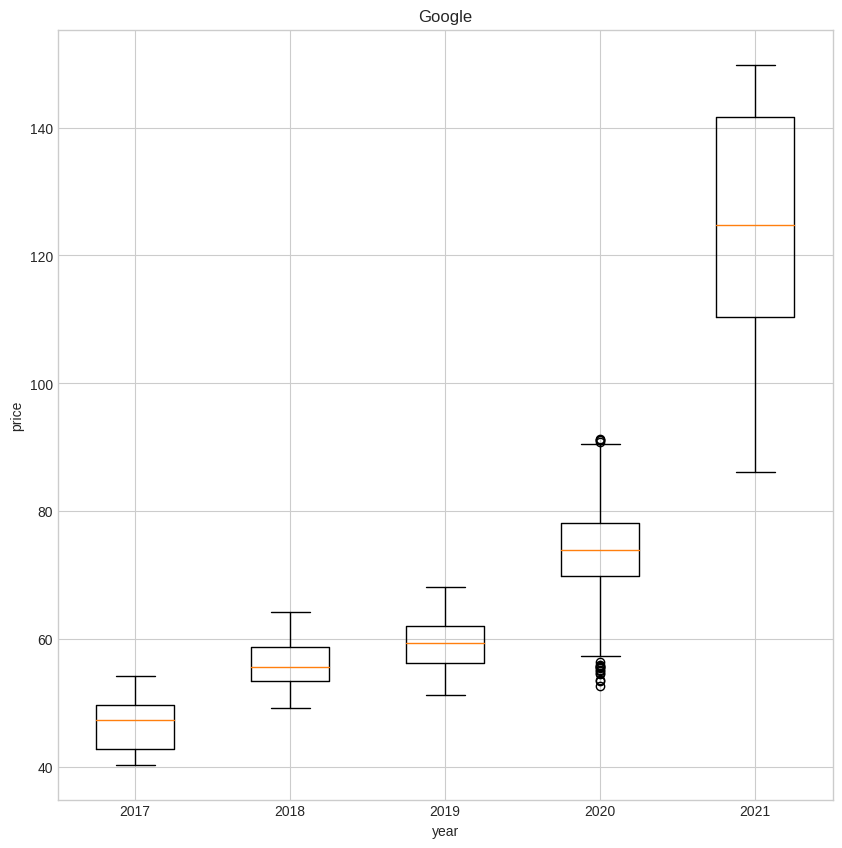

In [15]:
google = si.get_data('googl')
google_2017 = google[(google.index > '2017-01-01') & (google.index < '2018-01-01')]['close']
google_2018 = google[(google.index > '2018-01-01') & (google.index < '2019-01-01')]['close']
google_2019 = google[(google.index > '2019-01-01') & (google.index < '2020-01-01')]['close']
google_2020 = google[(google.index > '2020-01-01') & (google.index < '2021-01-01')]['close']
google_2021 = google[(google.index > '2021-01-01') & (google.index < '2022-01-01')]['close']

fig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot([google_2017, google_2018, google_2019, google_2020, google_2021])
ax.set(xlabel='year', ylabel='price', title='Google')
ax.set_xticklabels(['2017', '2018', '2019', '2020', '2021'])
plt.show()

In [16]:
price_earning = pd.read_csv('price_earning.csv')
corr = price_earning[['eps_ttm', 'eps_ttm_diff', 'epssurprisepct', 'close_mean']].corr()
corr

,eps_ttm,eps_ttm_diff,epssurprisepct,close_mean
eps_ttm,1.000000,0.277617,0.458074,0.845375
eps_ttm_diff,0.277617,1.000000,0.593368,0.225704
epssurprisepct,0.458074,0.593368,1.000000,0.434751
close_mean,0.845375,0.225704,0.434751,1.000000


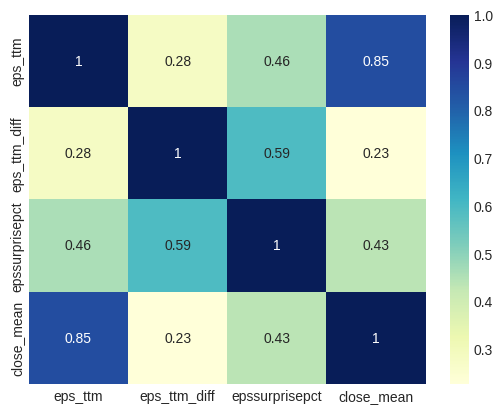

In [17]:
import seaborn as sns

sns.heatmap(corr, cmap='YlGnBu', annot=True)
plt.show()

<ipython-input-18-9f23493e027a>:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(stem, eps_ttm_diff, use_line_collection=True) # 줄기(정수)/잎(소수)


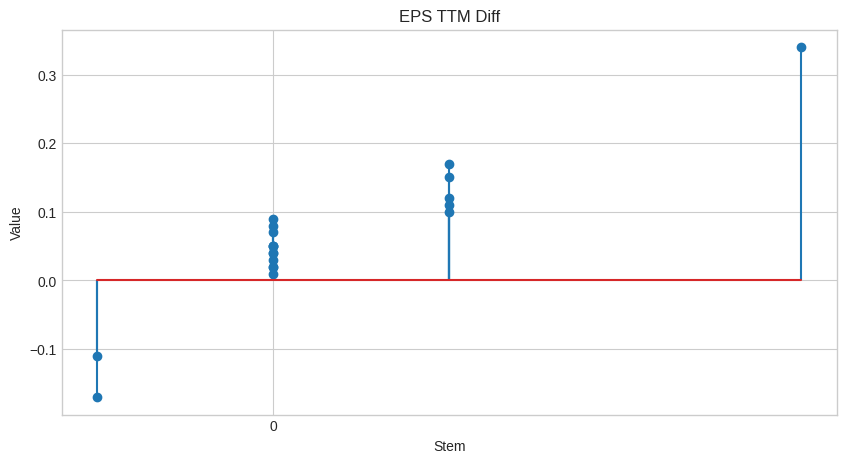

In [18]:
# 줄기-잎 그림
eps_ttm_diff = price_earning['eps_ttm_diff']
stem = eps_ttm_diff.map(lambda x: int(x*10))

fig, ax = plt.subplots(figsize=(10, 5))
ax.stem(stem, eps_ttm_diff, use_line_collection=True) # 줄기(정수)/잎(소수)
ax.set(xlabel='Stem', ylabel='Value', title='EPS TTM Diff')
ax.set_xticks(np.arange(int(eps_ttm_diff.min()), int(eps_ttm_diff.max())+1))
plt.show()

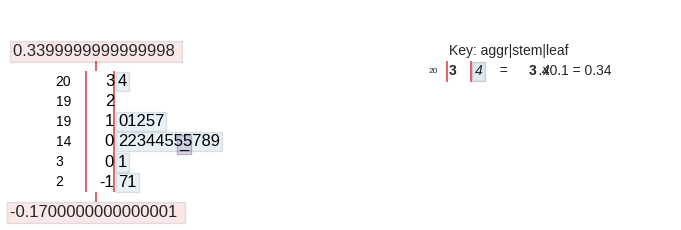

In [19]:
!pip install stemgraphic > /dev/null&
import stemgraphic

fig, ax = stemgraphic.stem_graphic(price_earning['eps_ttm_diff'], scale=0.1)
plt.show()

In [20]:
price_earning['eps_ttm'].mean()

1.7875

In [21]:
price_earning['eps_ttm'].min(), price_earning['eps_ttm'].max(),

(1.27, 2.6)

In [22]:
import random
random.seed(8)
random_eps_ttm = [random.uniform(5, 200) for i in range(10)]
random_eps_ttm = sorted(random_eps_ttm, reverse=False)
random_eps_ttm

[21.61112726989677,
 29.634525236917614,
 45.832538218337994,
 49.20764257930452,
 53.25099206117159,
 94.53108374061736,
 130.16434483906085,
 142.43929995996353,
 192.64753198770464,
 199.83006513670293]

In [24]:
new_observation = pd.DataFrame({'eps_ttm': random_eps_ttm})
new_observation

,eps_ttm
0,21.611127
1,29.634525
2,45.832538
3,49.207643
4,53.250992
5,94.531084
6,130.164345
7,142.439300
8,192.647532
9,199.830065


In [25]:
prediction = (model.get_prediction(new_observation).summary_frame(alpha=0.05))
prediction

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,499.274286,67.427142,357.615117,640.933456,356.991306,641.557267
1,682.471123,94.707237,483.498602,881.443644,483.053996,881.888249
2,1052.317508,149.786332,737.628101,1367.006915,737.346796,1367.288220
3,1129.380673,161.263242,790.579174,1468.182171,790.317874,1468.443472
4,1221.701761,175.012574,854.013987,1589.389536,853.773201,1589.630322
5,2164.242843,315.387175,1501.638976,2826.846711,1501.505330,2826.980357
6,2977.850835,436.560823,2060.670580,3895.031089,2060.574025,3895.127644
7,3258.122729,478.302856,2253.245716,4262.999741,2253.157587,4263.087871
8,4404.518471,649.040507,3040.934966,5768.101977,3040.870019,5768.166924
9,4568.515989,673.465385,3153.617717,5983.414261,3153.555125,5983.476853


In [26]:
prediction['prediction_error'] = (prediction['mean'] - prediction['obs_ci_lower'])
prediction['prediction_error']

0     142.282980
1     199.417126
2     314.970712
3     339.062799
4     367.928561
5     662.737513
6     917.276809
7    1004.965142
8    1363.648453
9    1414.960864
Name: prediction_error, dtype: float64

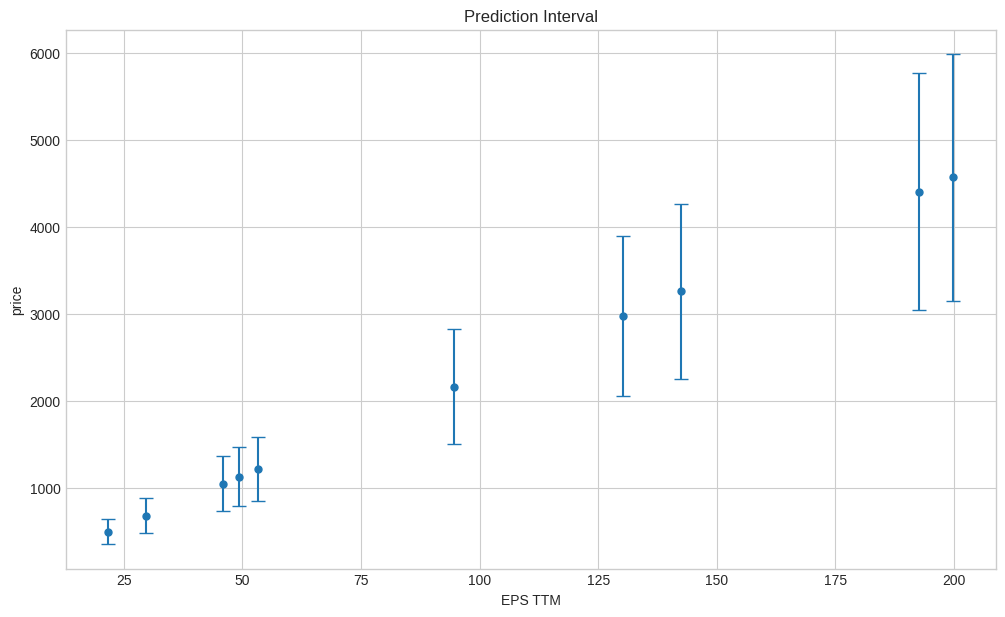

In [27]:
fig, ax = plt.subplots(figsize=(12, 7))

# 오차 막대 그래프
ax.errorbar(x=new_observation['eps_ttm'],
            y=prediction['mean'],
            yerr=prediction['prediction_error'],
            fmt='o', markersize=5, capsize=5)
ax.set(xlabel='EPS TTM', ylabel='price', title='Prediction Interval')
plt.show()